In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from tabulate import tabulate

In [2]:
def load_exp(name):
    loss_history_path = os.path.join('nn_exp_losses/', name, 'loss.txt')
    coords_history_path = os.path.join('nn_exp_losses/', name, 'coords.txt')
    with open(loss_history_path, "r") as loss, open(coords_history_path, "r") as coords:
        loss = list(map(float, loss.readlines()))
        coords = list(map(int, coords.readlines()))
        return loss, coords

In [3]:
def get_exp(name, label):
    loss, coords = load_exp(name)
    return {
        "name": name,
        "label": label,
        "loss": loss,
        "coords": np.cumsum(coords),
    }

In [17]:
experiments = [
    get_exp('rand05', "Rand 0.5"),
    get_exp('without', "Without"),
    get_exp('expSmoothing', "ExpSmoothing"),
    get_exp('multiplication_penalty', "Multiplication Penalty"),
    get_exp('subtraction_penalty', "Subtraction Penalty"),
]
experiments[0]['coords'] = experiments[0]['coords'][:80]
experiments[0]['loss'] = experiments[0]['loss'][:80]
experiments[1]['coords'] = experiments[1]['coords'][:80]
experiments[1]['loss'] = experiments[1]['loss'][:80]

experiments.sort(key=lambda exp : exp['coords'][-1])

table = [
    ["compression", "transmitted coordinates"],
    *[
        [exp['name'], exp['coords'][-1]]
        for exp in experiments
    ]
]
print(tabulate(table))

----------------------  -----------------------
compression             transmitted coordinates
multiplication_penalty  304373697
subtraction_penalty     304373697
expSmoothing            310430885
rand05                  605718800
without                 1211437600
----------------------  -----------------------


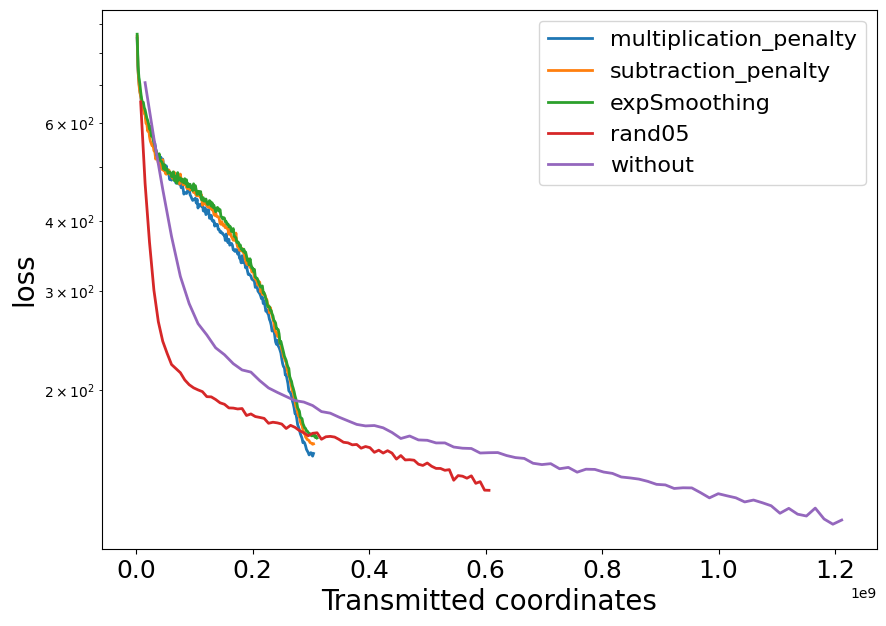

In [18]:
plt.figure(figsize=(10, 7))

for exp in experiments:
    plt.semilogy(
        exp['coords'],
        exp['loss'],
        label=exp['name'],
        linewidth=2
    )

plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Transmitted coordinates", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)